In [15]:
!ls

best_so_far.pth.tar			      ResNet34.pth.tar
README.md				      resnet_50_original.pth.tar
resnet_18_grad_noise.pth.tar		      Resnet Code
resnet_18_grad_noise_started_earlier.pth.tar  Untitled.ipynb
resnet_18_lower_lr.pth.tar		      Visualization.ipynb
resnet_18_original.pth.tar		      yolo2


In [71]:
# Loads a model including the error array and plots it alongside the number of epochs.
import torch
from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib
import pandas as pd
%matplotlib inline

model = 'ResNet-18'

# Plot image

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
a.keys()

dict_keys(['best_top5', 'epoch', 'loss_history', 'optimizer', 'best_top1', 'state_dict'])

In [78]:
filename = 'ResNet34.pth.tar'
def get_loss_history(filename):
    return torch.load(filename)

a = get_loss_history(filename)
print(filename)
a['best_top1'], a['best_top5'], a['epoch']

ResNet34.pth.tar


(53.39900268764496, 80.26800336494446, 71)

In [79]:
a.keys()

dict_keys(['best_top5', 'epoch', 'loss_history', 'optimizer', 'best_top1', 'state_dict'])

In [80]:
a['loss_history']['train']

[0,
 4.263777135467529,
 3.9028880534410475,
 3.681137269473076,
 3.53878742043972,
 3.4142425325155257,
 3.314619131398201,
 3.218110879898071,
 3.1412144399046897,
 3.0726960748910903,
 3.0021992141127587,
 2.939690418934822,
 2.8821173994660376,
 2.83627189347744,
 2.7902076897263526,
 2.7481544182419775,
 2.70122769677639,
 2.6687869307875633,
 2.6299218504309656,
 2.5967815644145014,
 2.5511432398438454,
 2.513318140244484,
 2.480290794479847,
 2.4538444911956785,
 2.427708067679405,
 2.3934356048226357,
 2.3606088630318642,
 2.330812617647648,
 2.305224732029438,
 2.2749886778235435,
 2.253588773667812,
 2.089082369661331,
 2.03410288490057,
 2.0151489740729334,
 1.9961322037100793,
 1.9845240164995193,
 1.9687638938605785,
 1.9605930552780628,
 1.952289240258932,
 1.9417205592274667,
 1.9309728758454323,
 1.9272878515303136,
 1.9221019257724286,
 1.9085503952622414,
 1.9038114680945872,
 1.8960309232831,
 1.8912937283873559,
 1.8874244852125646,
 1.8825892077028752,
 1.868011798

In [84]:
a['loss_history']['val']

[0,
 3.489833939552307,
 3.5096287922859193,
 3.2233375821113586,
 2.964699596643448,
 3.3544870619773866,
 4.385341248512268,
 71.0792425107956,
 2.9116477127075195,
 2.565375005602837,
 2.600100867629051,
 2.51171307849884,
 2.7799826596975326,
 2.579666912198067,
 2.7768678332567216,
 4.034667249560356,
 5.909411527991295,
 2.3704933459758757,
 13.470115962743758,
 2.4410322271585465,
 9.550227569937705,
 3.8732954928874967,
 5.47877457177639,
 3.2458097397089003,
 2.8309551364183427,
 7.923108650803566,
 17.29889261496067,
 13.71036294722557,
 9.380853751659393,
 2.109052904844284,
 2.0057811007499695,
 2.240008808851242,
 8.161580015420913,
 18.115742884099483,
 17.346090485334397,
 46.82335100269318,
 17.695739491581918,
 30.13161168861389,
 32.86860382354259,
 9.567115292668342,
 11.290049228668213,
 36.8090901697278,
 7.210657541036606,
 27.380948638141156,
 57.005662583231924,
 35.79306792277098,
 11.296311588704587,
 39.186612833201885,
 58.31882165527344,
 47.946410850584506

Text(0.5,0,'Epoch')

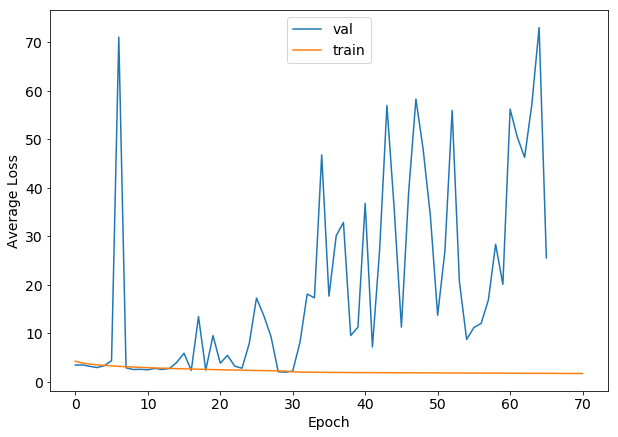

In [83]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

plt.figure(figsize=(10, 7))
plt.plot(a['loss_history']['val'][1:], label='val');
plt.plot(a['loss_history']['train'][1:], label='train');
plt.legend();
plt.ylabel('Average Loss')
plt.xlabel('Epoch')

In [59]:
len(a['val'])

KeyError: 'val'

# Visualizing Mistakes

In [137]:
!ls ../data

categories.txt	images	objects  train.txt  val.txt


In [228]:
categories.split(' ')

['/a/abbey',
 '0\n/a/airport_terminal',
 '1\n/a/amphitheater',
 '2\n/a/amusement_park',
 '3\n/a/aquarium',
 '4\n/a/aqueduct',
 '5\n/a/art_gallery',
 '6\n/a/assembly_line',
 '7\n/a/auditorium',
 '8\n/b/badlands',
 '9\n/b/bakery/shop',
 '10\n/b/ballroom',
 '11\n/b/bamboo_forest',
 '12\n/b/banquet_hall',
 '13\n/b/bar',
 '14\n/b/baseball_field',
 '15\n/b/bathroom',
 '16\n/b/beauty_salon',
 '17\n/b/bedroom',
 '18\n/b/boat_deck',
 '19\n/b/bookstore',
 '20\n/b/botanical_garden',
 '21\n/b/bowling_alley',
 '22\n/b/boxing_ring',
 '23\n/b/bridge',
 '24\n/b/bus_interior',
 '25\n/b/butchers_shop',
 '26\n/c/campsite',
 '27\n/c/candy_store',
 '28\n/c/canyon',
 '29\n/c/cemetery',
 '30\n/c/chalet',
 '31\n/c/church/outdoor',
 '32\n/c/classroom',
 '33\n/c/clothing_store',
 '34\n/c/coast',
 '35\n/c/cockpit',
 '36\n/c/coffee_shop',
 '37\n/c/conference_room',
 '38\n/c/construction_site',
 '39\n/c/corn_field',
 '40\n/c/corridor',
 '41\n/c/courtyard',
 '42\n/d/dam',
 '43\n/d/desert/sand',
 '44\n/d/dining_room

In [210]:
col_names = ['top1','top2','top3','top4','top5','actual']
df = pd.read_csv('~/val_output.txt', sep=' ', names=col_names)
categories = open("../data/categories.txt","r+").read()

# Categ_num to class (2 istead of -1 because of outdoor scenes)
categ_map = {cat.split(' ')[-1]: cat.split(' ')[0].split('/')[2] for cat in categories.split('\n')[:-1]}

In [211]:
col_names = ['top1','top2','top3','top4','top5','actual']
df = pd.read_csv('~/val_output.txt', sep=' ', names=col_names)

In [226]:
{cat.split(' ')[0].split('/')[2]: cat.split(' ')[0].split('/')[-1] for cat in categories.split('\n')[:-1] if cat.split(' ')[0].split('/')[-1]=='outdoor'}

{'church': 'outdoor',
 'ice_skating_rink': 'outdoor',
 'market': 'outdoor',
 'monastery': 'outdoor',
 'swimming_pool': 'outdoor',
 'track': 'outdoor'}

In [216]:
df['is_top1'] = np.where(df['actual'] == df['top1'], 1, 0)
df['is_top5']  = np.where(df['actual'] == df['top1'], 1, 0) + \
                 np.where(df['actual'] == df['top2'], 1, 0) + \
                 np.where(df['actual'] == df['top3'], 1, 0) + \
                 np.where(df['actual'] == df['top4'], 1, 0) + \
                 np.where(df['actual'] == df['top5'], 1, 0) 

In [218]:
df['category'] = df['actual'].apply(lambda x: categ_map[str(x)])

In [221]:
grouped = df.groupby('category')

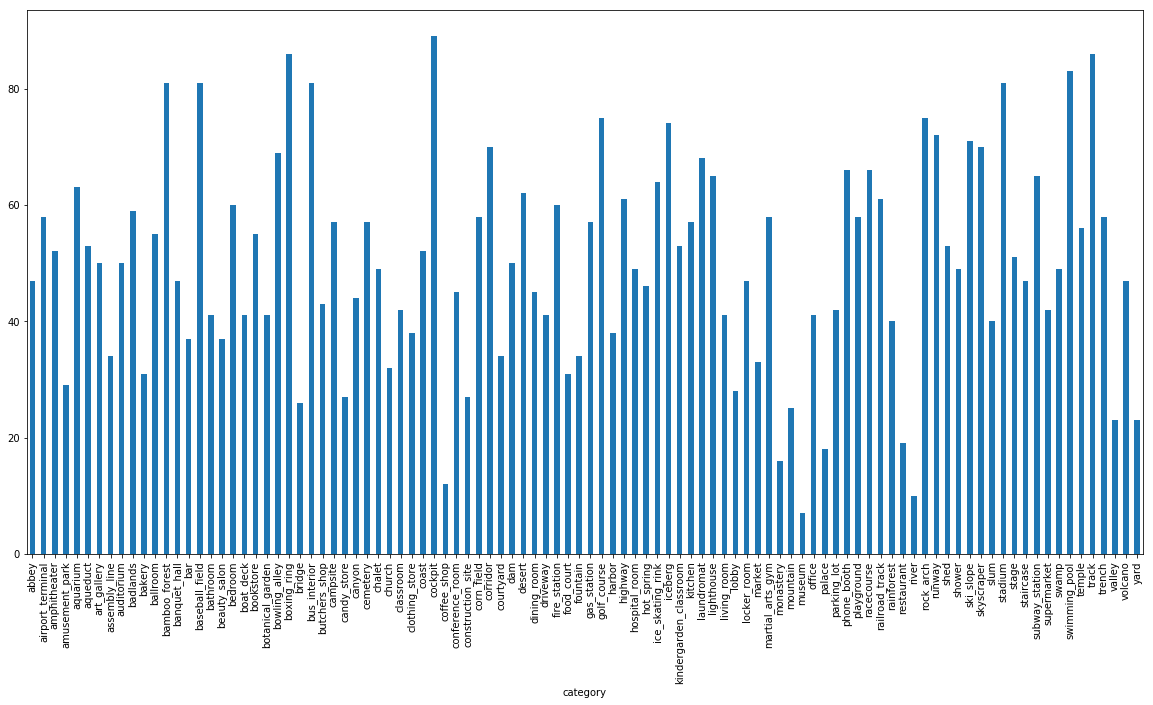

In [244]:
grouped.apply(lambda x: sum(x['is_top1'])).plot.bar(figsize=(20, 10));

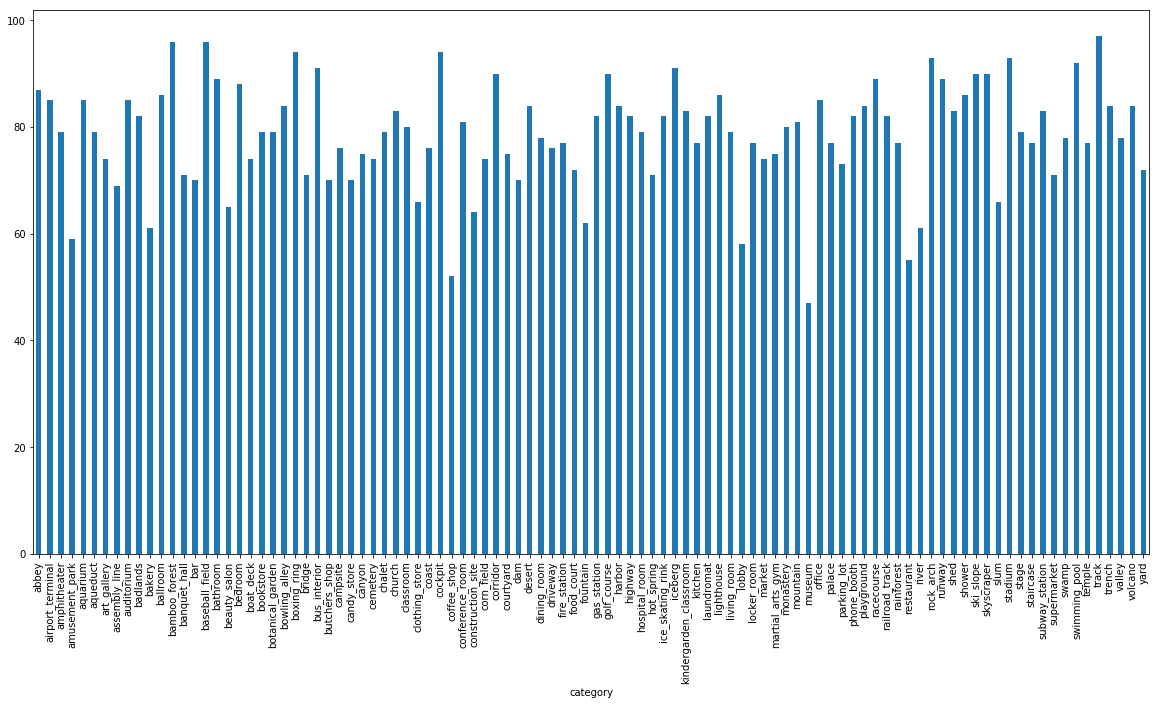

In [246]:
grouped.apply(lambda x: sum(x['is_top5'])).plot.bar(figsize=(20, 10));

In [234]:
dfcopy = df.copy()

In [237]:
def name_classifications(df, category):
    return df.category.apply(lambda x: categ_map[str(x)])

In [241]:
dfcopy['top1'] = df['top1'].apply(lambda x: categ_map[str(x)])
dfcopy['top2'] = df['top2'].apply(lambda x: categ_map[str(x)])
dfcopy['top3'] = df['top3'].apply(lambda x: categ_map[str(x)])
dfcopy['top4'] = df['top4'].apply(lambda x: categ_map[str(x)])
dfcopy['top5'] = df['top5'].apply(lambda x: categ_map[str(x)])

In [259]:
to_analyse = 'museum'

In [260]:
dfstuff = pd.DataFrame()

In [261]:
dfstuff['top1'] = dfcopy[dfcopy['category'] == to_analyse]['top1'].value_counts()
dfstuff['top2'] = dfcopy[dfcopy['category'] == to_analyse]['top2'].value_counts()
dfstuff['top3'] = dfcopy[dfcopy['category'] == to_analyse]['top3'].value_counts()
dfstuff['top4'] = dfcopy[dfcopy['category'] == to_analyse]['top4'].value_counts()
dfstuff['top5'] = dfcopy[dfcopy['category'] == to_analyse]['top5'].value_counts()

In [262]:
dfstuff

,top1,top2,top3,top4,top5
art_gallery,9,6.0,2.0,1.0,3.0
museum,7,12.0,12.0,8.0,8.0
staircase,5,1.0,1.0,2.0,NaN
bakery,5,2.0,2.0,3.0,2.0
assembly_line,4,3.0,4.0,6.0,NaN
lobby,4,6.0,2.0,2.0,3.0
fire_station,4,2.0,NaN,3.0,2.0
airport_terminal,4,3.0,4.0,2.0,3.0
office,3,2.0,NaN,3.0,5.0
locker_room,3,1.0,2.0,4.0,NaN
